In [5]:
### FIGURE 2: VALIDATION DATA OVERVIEW PLOT

import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import matplotlib.colors as cm
from netCDF4 import Dataset
from sys import path
import copy
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

import warnings
warnings.filterwarnings("ignore")

In [6]:
### LOAD INPUT FILEPATHS

figpath = '/Users/gycheong/Downloads/michel_csao/'

aspmon_path = figpath + 'data/ASPeCT/gridded/'
oibpath = figpath + 'data/OIB/gridded/'
csao_fpath = '/Users/gycheong/Downloads/michel_csao/data/CSAO/'

In [7]:
csao_sits = []
summer_index = [1,2,3,10,11,12]

for year in range(2014, 2021):
    year_str = '%04d' % year
    print(year_str)

    for month in summer_index:
        month_str = '%02d' % month
        month = int(month_str)
        date = year_str+month_str
    
        if int(year_str) > 2013:
            csao_path = csao_fpath + f'fb_sla_cs2_sam_{year_str}.nc'
        else:
            csao_path = '/home/gch/CSAO/DATA/' + f'fb_sla_cs2_sam_{year_str}_NOSIT.nc'
        
        if (os.path.exists(csao_path) == True):
            if int(year_str) == 2017:
                csao = np.asarray(Dataset(csao_path)['sit_sd_ASD_sh_radar_freeboard_20hz_mean'][month-10])
            else:
                csao = np.asarray(Dataset(csao_path)['SIT_ASD_mean'][month-1])
            
            csao[csao<-10]=np.nan
            csao[csao>10]=np.nan

            if (~np.isnan(csao).all()):
                csao_sits.append(csao)

climatology = np.nanmean(csao_sits, axis=0)

lat = np.asarray(Dataset(csao_path)['lat'])
lon = np.asarray(Dataset(csao_path)['lon'])


2014
2015
2016
2017
2018
2019
2020


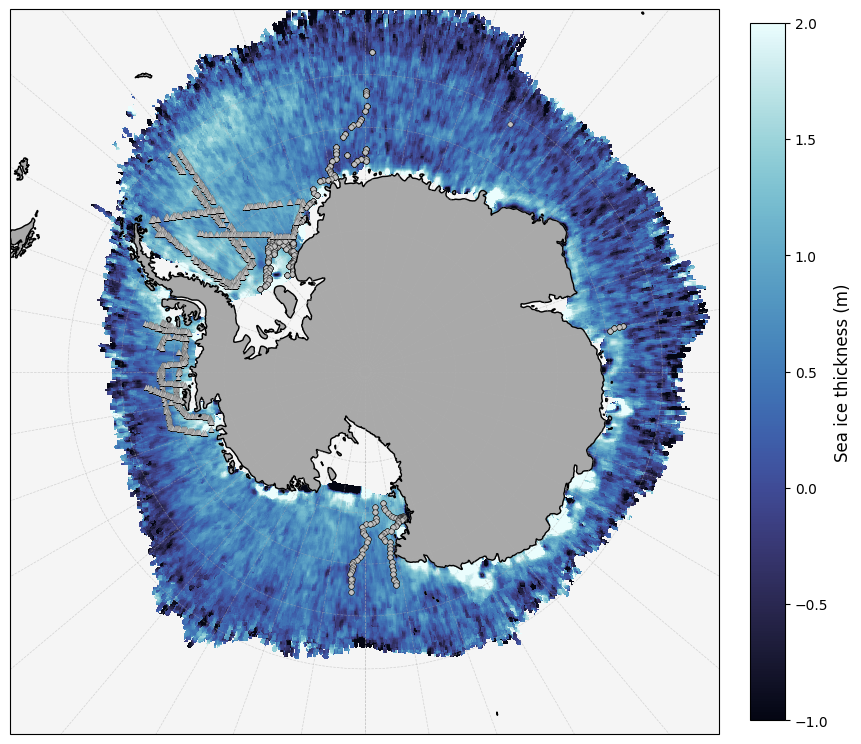

In [13]:
# plot contourf + scatter

# plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())  
s = ax.pcolormesh(lon, lat, climatology, vmin=-1, vmax=2,cmap = cmocean.cm.ice,transform=ccrs.PlateCarree())

# loop through aspect data to plot scatter on top of contourf
for filename in os.listdir(aspmon_path):
    aspect = np.asarray(Dataset(aspmon_path+filename)['sea_ice_thickness'])
    lat = np.asarray(Dataset(aspmon_path+filename)['lat'])
    lon = np.asarray(Dataset(aspmon_path+filename)['lon'])
    date = filename[7:13]
    year = filename[7:11]
    month = filename[11:13]
    mask = ~np.isnan(aspect)
    p = ax.scatter(lon[mask],lat[mask],s=15,c='silver',
                   linewidths=0.3,edgecolor='k',
                   vmin=-2,vmax=2,
                    transform=ccrs.PlateCarree())
  
# loop through aspect data to plot scatter on top of contourf
for filename in os.listdir(oibpath):
    if filename.startswith("20"):
        aspect = np.asarray(Dataset(oibpath+filename)['sea_ice_thickness'])
        lat = np.asarray(Dataset(oibpath+filename)['lat'])
        lon = np.asarray(Dataset(oibpath+filename)['lon'])
        date = filename[7:13]
        year = filename[7:11]
        month = filename[11:13]
        mask = ~np.isnan(aspect)
        p = ax.scatter(lon[mask],lat[mask],s=20, marker='^', c='silver',
                       linewidths=0.1,edgecolor='k',
                       vmin=-2.5,vmax=1.5,transform=ccrs.PlateCarree())


ax.gridlines(xlocs=np.arange(-180, 181, 10), ylocs=np.arange(-91, -60, 5), linewidth=0.5, linestyle='--', alpha=0.5)
# # tick_values = np.linspace(sit.min(), sit.max(), 5)
ax.add_feature(cfeature.LAND, color='darkgrey', zorder=1)
ax.add_feature(cfeature.OCEAN, color='whitesmoke',edgecolor='black')
ax.coastlines()
# ax1.set_title('ASPeCt',size=12)

# cbar = plt.colorbar(s, fraction=0.045, pad=0.04)
cbar2 = plt.colorbar(s, fraction=0.045, pad=0.04)

cbar2.set_label('Sea ice thickness (m)', fontsize=12)
# plt.savefig('/home/gch/CSAO/Figures/Figures_final/aspect_csao_overview.png',bbox_inches='tight', dpi=300)
plt.show()
